# Final Project 

**Course:** DSCI 100

**Author:** Ning Hu, Michael Alexander Gunardi, Gavin Lei, Michael Leung

**Group:** 30

**Date:** Due Dec 6th

**Question choose:**  1. What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)
library(readr)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

## 1. Introduction
A research group in Computer Science at UBC, led by Frank Wood, is collecting data about how people play video games. They have set up a Minecraft serverLinks to an external site, and players' actions are recorded as they navigate through the world

During this research session, the broad problem our group is trying to figure out is **What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types**?. More specifically, **Can the player's total playtime and age predict whether they subscribe to the newsletter in the player database**?

In [2]:
players <- read.csv("https://raw.githubusercontent.com/gavinlei060322-cmd/GroupProject_DSCI-100-group-30-section-003-/refs/heads/main/players.csv")
head(players)

,experience,subscribe,hashedEmail,played_hours,name,gender,Age
,<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<int>
1,Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
2,Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
3,Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
4,Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
5,Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
6,Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


## Summary: 
This dataset frame contains information about individual players, including their experience level, subscription status, playtime, name, gender, and age. Each record represents a unique player identified by a hashed email address.

Number of observations: 196 players

Number of Variables: 7

## Data Description

- **Number of Observations**:
  - `players.csv`: 196 observations (rows)

- **Summary Statistics**:
  - **Age**: Min = 9, Max = 58, Mean = 21.14, Median = 19.00
  - **Played Hours**: Min = 0.00, Max = 223.10, Mean = 5.85, Median = 0.10

- **Observable Variables**:
  - **`players.csv`**:
    - **subscribe**: Logical (subscription status - TRUE or FALSE)
    - **played_hours**: Numeric (total number of hours played)
    - **Age**: Numeric (player's age)
 
- **Not Fully Observable Variables (Uses Characters)**:
  - **`players.csv`**:
    - **experience**: Character (level of experience: Pro, Veteran, Amateur)
    - **hashedEmail**: Character (unique identifier for each player)
    - **name**: Character (player's name)
    - **gender**: Character (player's gender)
 
- **Potential Issues**:
  - **Missing Data**: The `Age` and `gender` variables have a few NA's in the dataset.
  - **Outliers**: The `played_hours` variable contains a few extreme values (e.g., 223.1 hours).
  - **Data Types**: The `start_time` and `end_time` columns in `sessions.csv` are currently in character format and need conversion to `DateTime`.

## 2. Methods & Result

#### Method 
The method that we will be using to address the question **Can the player's total playtime and age predict whether they subscribe to the newsletter in the player database?** will be the KNN classification model. This will allow us to classify players as "subscribers" and "non-subscribers" based on their playtime and age.

<h3> Loading data</h3>

In [7]:
head(players)

,experience,subscribe,hashedEmail,played_hours,name,gender,Age
,<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<int>
1,Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
2,Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
3,Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
4,Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
5,Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
6,Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


<h3> Data wrangling and clean</h3>

Before exploring the data, we first clean the `players.csv`.csv dataset to keep only the variables that are relevant to our predictive question.
Since our goal is to understand how player characteristics relate to newsletter subscription, we focus on variables that describe experience, demographics, and engagement.

We remove the following columns:

`hashedEmail`: this is an identifier used to link with the sessions dataset. It does not provide useful information for predicting subscription and should not be used to avoid data leakage.

`name`: not a meaningful feature and may contain personal information.

Now clean up those identity variables in data frame and keep other variables: experience, played_hours, age, gender, subscribe

In [8]:
players_clean <- select(players, experience, played_hours, Age, gender, subscribe)|>
    drop_na(Age)
players_clean

experience,played_hours,Age,gender,subscribe
<chr>,<dbl>,<int>,<chr>,<lgl>
Pro,30.3,9,Male,TRUE
Veteran,3.8,17,Male,TRUE
Veteran,0.0,17,Male,FALSE
⋮,⋮,⋮,⋮,⋮
Veteran,0.3,22,Male,FALSE
Amateur,0.0,57,Prefer not to say,FALSE
Amateur,2.3,17,Male,FALSE



<h2>Summary of the dataframe above :</h2>

<h2>Variables</h2>

 Variable Name | Type | Description | Example Value |
|----------------|------|--------------|----------------|
| `experience` | Categorical (`chr`) | Player’s skill level or rank. | `Pro` |
| `subscribe` | Boolean (`lgl`) | Indicates whether the player has an active subscription (TRUE) or not (FALSE). | `TRUE` |
| `played_hours` | Numeric (`dbl`) | Total number of hours the player has spent playing. | `30.3` |
| `gender` | Categorical (`chr`) | Player’s gender identity | `male` |
| `Age` | Numeric (`dbl`) | Player’s age in years. Contains some missing values (`NA`). | `17` |

---

<h2>Summary Statistic</h2>

Summary statistics help us understand the general distribution of the numeric variables before modelling. For example, the played_hours variable contains some extreme values and many zeros, which may affect prediction. Checking missing values also helps us decide how to clean the data.

| Variable | Mean | Min | Max | Missing (%) |
|-----------|------|-----------|------|--------------|
| `played_hours` | *5.85* | *0* | *223.1* | 0% |
| `Age` | *21.14* | *9* | *58* | 1.02% |
---

<h2>Some of the problems that can be observed in the dataframe</h2>

<h3>Direct Observations of data that is relevant for exploratory data analysis related to the planned analysis </h3>

- The **played_hours** variable contains many zeros, possibly representing new players who have not yet begun playing; however, this might affect our later prediction in answering the question based on the data.

- The **Age** variable has some missing values, which must be handled before modelling.


<h2>Visualization of relevant variables</h2>

We now visualize both age and playtime to observe the initial trends. First, we compare age and mean played hours, and colour it using the subscribe status. We can observe a trend in this graph : the people with higher mean played hours tend to be subscribed. On the other hand, people with lower hours tend to not be subscribed. This happens irrelevant of age.

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


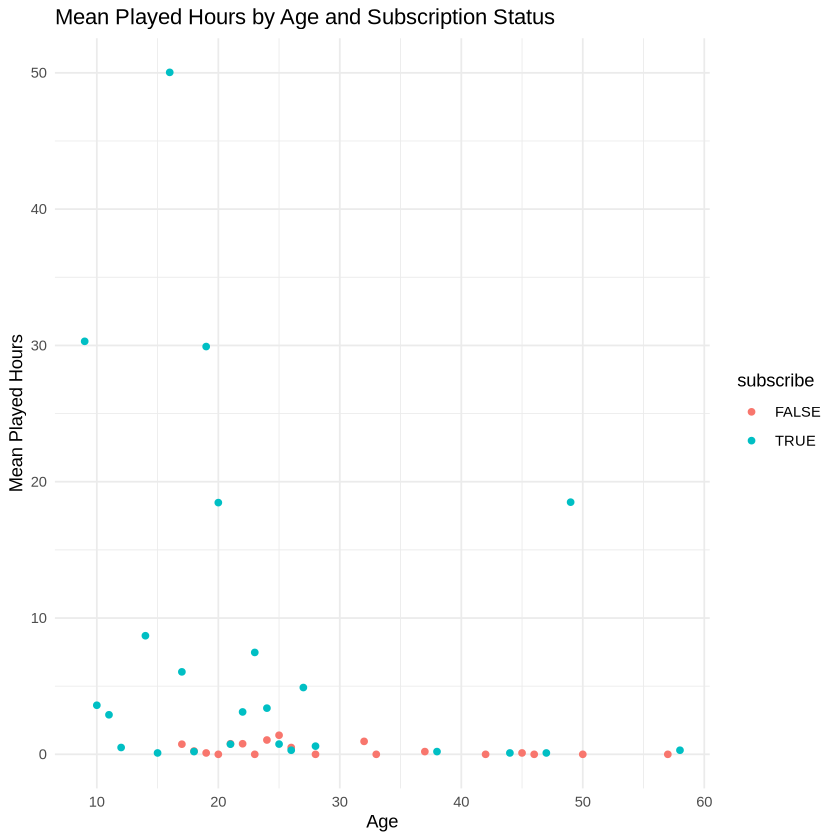

In [18]:
players |>
  group_by(subscribe, Age) |>
  summarise(mean_hours = mean(played_hours), .groups = "drop") |>
  ggplot(aes(x = Age, y = mean_hours, color = subscribe)) +
  geom_point() +
  labs(title = "Mean Played Hours by Age and Subscription Status",
       x = "Age",
       y = "Mean Played Hours") +
  theme_minimal()

Now, we separate both age and played_hours to see the trends individually. As we can see in the scatterplot for played hours, again, the people with the most played hours are subscribed. In the scatterplot for age, we can see that more young people are subscribed, while for the rest of the ages it is around the same distribution.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


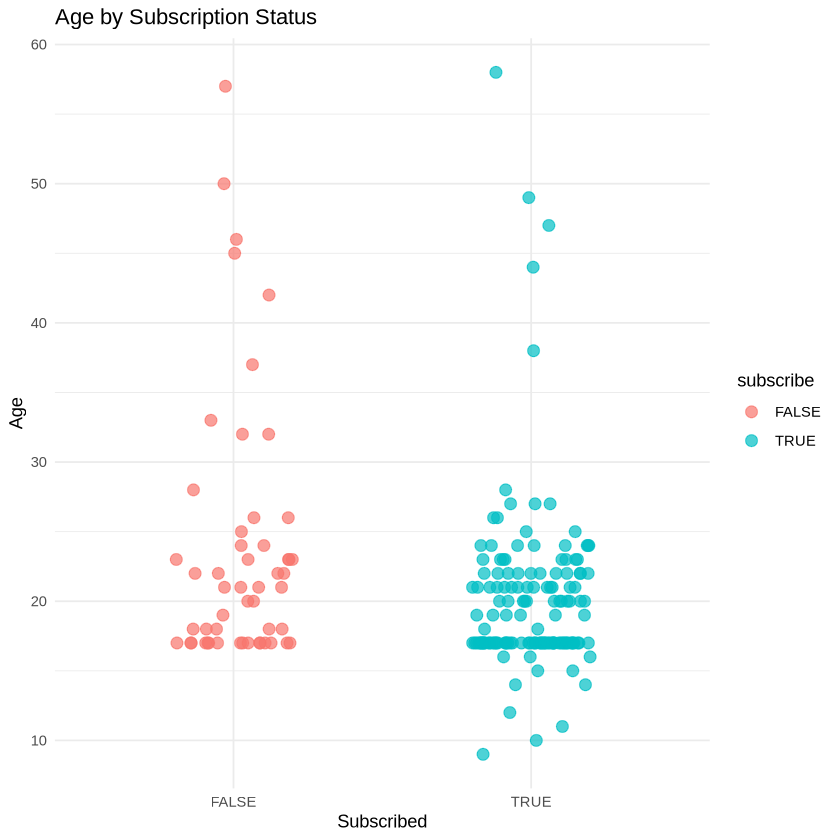

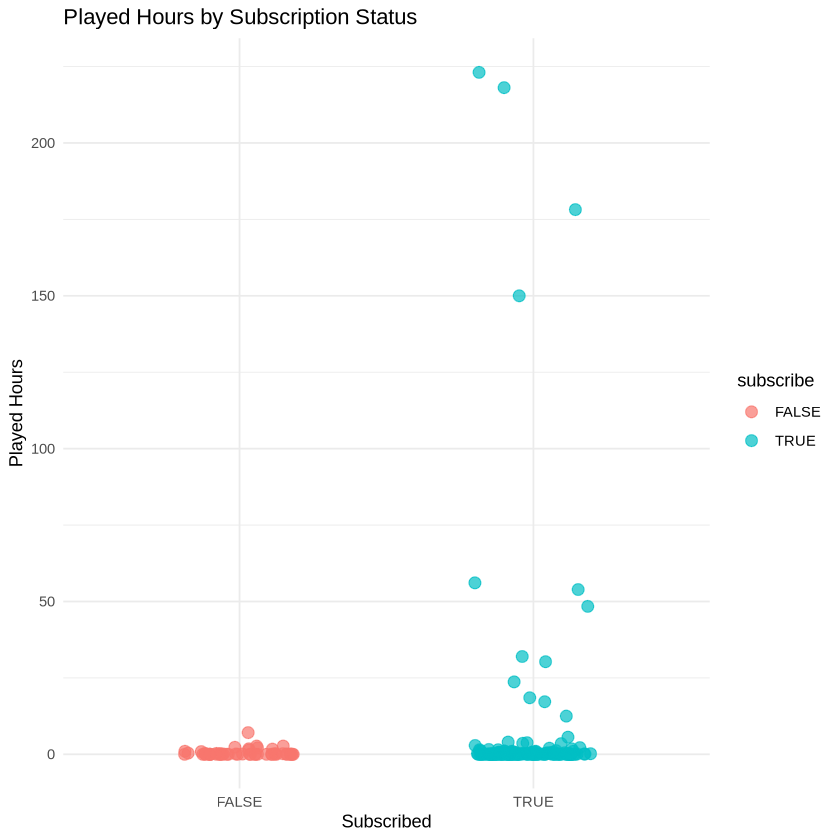

In [23]:
players |> 
  ggplot(aes(x = subscribe, y = Age, color = subscribe)) +
  geom_jitter(width = 0.2, height = 0, alpha = 0.7, size = 3) +
  labs(title = "Age by Subscription Status",
       x = "Subscribed",
       y = "Age") +
  theme_minimal()

players |> 
  ggplot(aes(x = subscribe, y = played_hours, color = subscribe)) +
  geom_jitter(width = 0.2, height = 0, alpha = 0.7, size = 3) +
  labs(title = "Played Hours by Subscription Status",
       x = "Subscribed",
       y = "Played Hours") +
       theme_minimal()

<h2>Data Analysis</h2>

### Traing and Spliting data

In [5]:
players_split <- initial_split(players_clean, prop = 0.75, strata = Age)
players_train <- training(players_split)
players_test <- testing(players_split)
players_train
players_test

experience,played_hours,Age,gender,subscribe
<chr>,<dbl>,<int>,<chr>,<lgl>
Pro,30.3,9,Male,TRUE
Veteran,3.8,17,Male,TRUE
Veteran,0.0,17,Male,FALSE
⋮,⋮,⋮,⋮,⋮
Regular,0.0,50,Male,FALSE
Amateur,2.1,24,Male,FALSE
Amateur,0.0,57,Prefer not to say,FALSE


experience,played_hours,Age,gender,subscribe
<chr>,<dbl>,<int>,<chr>,<lgl>
Amateur,0.7,21,Female,TRUE
Amateur,0.0,17,Female,TRUE
Veteran,0.0,22,Female,TRUE
⋮,⋮,⋮,⋮,⋮
Amateur,32.0,22,Male,TRUE
Veteran,0.1,44,Female,TRUE
Amateur,0.0,17,Female,TRUE


## 3. Discussion